In [6]:
# intitial imports
from fastbook import *
from fastai.vision.widgets import *


In [8]:
doc(get_image_files)

In [10]:
art = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=69),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [11]:
dls = art.dataloaders('art')

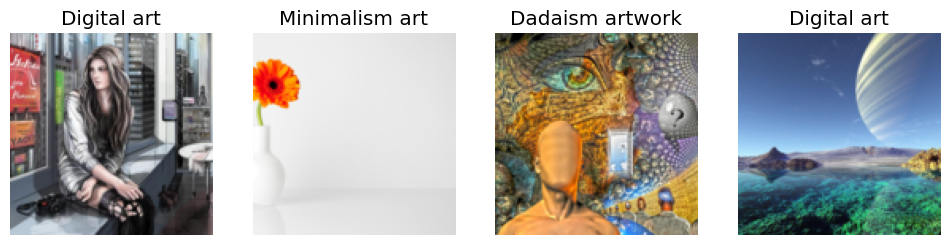

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

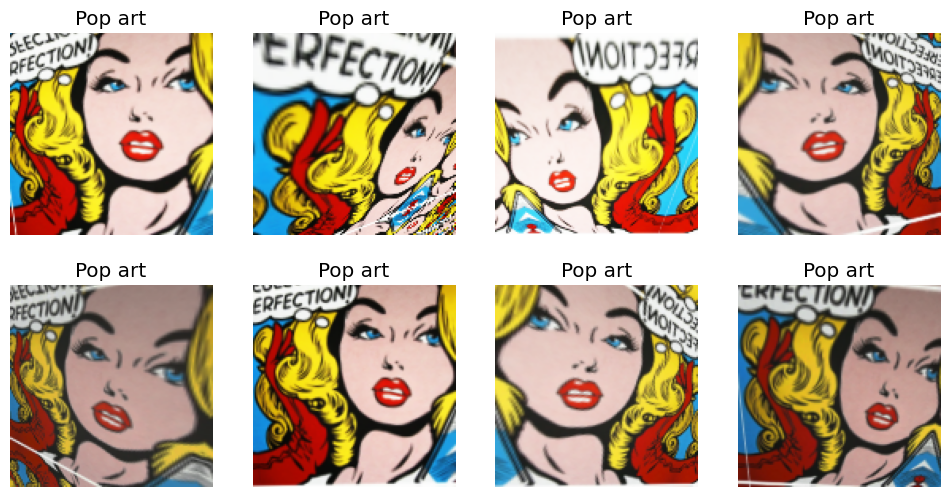

In [13]:
art = art.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = art.dataloaders('art')
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [14]:
art = art.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = art.dataloaders('art')

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/kalymaan/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.531137,0.821223,0.240146,06:02


/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-pack

epoch,train_loss,valid_loss,error_rate,time
0,0.952031,0.336407,0.097810,09:30
1,0.526525,0.231848,0.055474,09:44
2,0.285032,0.158765,0.045985,09:22
3,0.192255,0.141576,0.044526,09:19


/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-pack

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


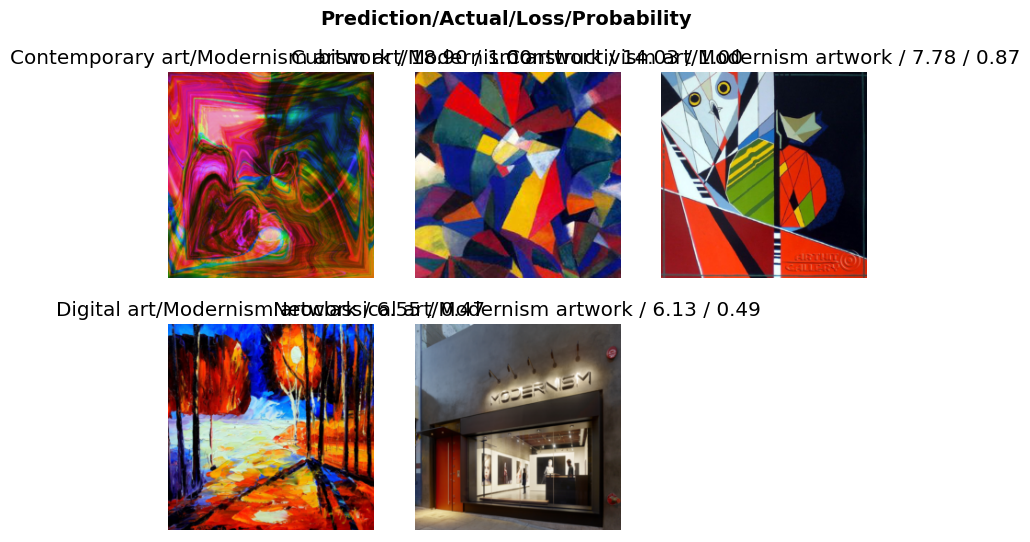

In [22]:
interp.plot_top_losses(5)

In [23]:
learn.export()